<a href="https://colab.research.google.com/github/2403a52026-lgtm/ML_LAB_Assignment/blob/main/ML_LAB_10_2403a52026_B_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("CO2 Emissions_Canada (1).csv")

# Select required columns
df = df[['Engine Size(L)', 'CO2 Emissions(g/km)']]

# Rename for simplicity
df.columns = ['EngineSize', 'CO2']

df.head()

,EngineSize,CO2
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [4]:
X = df[['EngineSize']]
y = df['CO2']

model = LinearRegression()
model.fit(X, y)

beta_1 = model.coef_[0]

print("Original Regression Coefficient (β1):", beta_1)

Original Regression Coefficient (β1): 36.77731518641943


In [5]:
B = 2000
boot_coeff = []

n = len(df)

for i in range(B):
    sample = df.sample(n=n, replace=True)

    X_sample = sample[['EngineSize']]
    y_sample = sample['CO2']

    model = LinearRegression()
    model.fit(X_sample, y_sample)

    boot_coeff.append(model.coef_[0])

boot_coeff = np.array(boot_coeff)

In [6]:
# 90% CI
ci_90 = np.percentile(boot_coeff, [5, 95])

# 95% CI
ci_95 = np.percentile(boot_coeff, [2.5, 97.5])

print("90% Confidence Interval:", ci_90)
print("95% Confidence Interval:", ci_95)

90% Confidence Interval: [36.25021277 37.28968124]
95% Confidence Interval: [36.15251175 37.37932081]


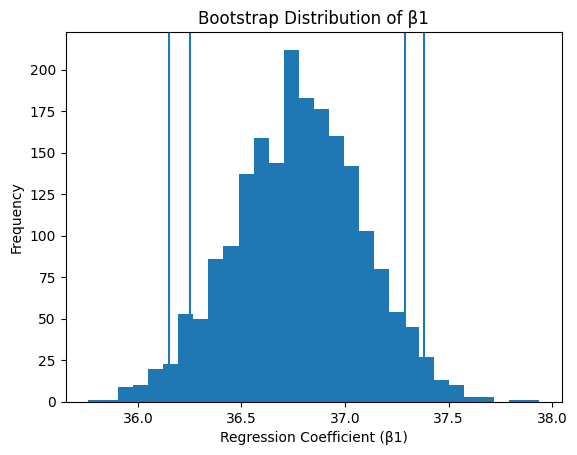

In [7]:
plt.hist(boot_coeff, bins=30)
plt.axvline(ci_90[0])
plt.axvline(ci_90[1])
plt.axvline(ci_95[0])
plt.axvline(ci_95[1])
plt.title("Bootstrap Distribution of β1")
plt.xlabel("Regression Coefficient (β1)")
plt.ylabel("Frequency")
plt.show()